In [2]:
import pandas as pd
import os

ori_data_pth = '/root/data/xingmei/Sharechat-RecSys-Challenge-23/data/train.csv'
trn_data_pth = '/root/data/xingmei/Sharechat-RecSys-Challenge-23/data/customized_trn.csv'
val_data_pth = '/root/data/xingmei/Sharechat-RecSys-Challenge-23/data/customized_val.csv'
saved_data_pth = '/root/data/xingmei/Sharechat-RecSys-Challenge-23/data/customized_trn_val.csv'

In [2]:
df = pd.read_csv(ori_data_pth, sep='\t')

In [3]:
df['f_1'].max()

66

## Drop RowId(f_0)

In [4]:
trn_df = df[df['f_1'] != 66].copy()
val_df = df[df['f_1'] == 66].copy()
trn_df.drop(columns='f_0', inplace=True)
val_df.drop(columns='f_0', inplace=True)

## Analyze

In [5]:
trn_df.sample(5)

,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,...,f_72,f_73,f_74,f_75,f_76,f_77,f_78,f_79,is_clicked,is_installed
1223263,62,20095,563,31686,21545,590,27941,19203,23218,19343,...,0.000000,0.000000,0.115692,1.156922,0.269948,0.0,0.0,0.0,0,0
2900209,57,14829,22294,26672,21545,8605,27941,21218,21533,19343,...,0.000000,0.000000,0.000000,1.156922,0.269948,0.0,0.0,0.0,1,0
1781042,58,26325,22294,9018,21545,26484,27941,18800,31372,22970,...,0.000000,0.000000,0.000000,0.925538,0.115692,0.0,0.0,0.0,0,0
588537,54,23611,22294,17511,25604,928,27941,19203,9638,19343,...,1.142243,0.571121,0.115692,1.156922,0.231384,0.0,0.0,0.0,0,0
145638,60,17216,7152,15742,21545,23877,27941,19203,14659,19343,...,0.000000,0.000000,0.000000,1.156922,0.269948,0.0,0.0,0.0,0,0


In [6]:
val_df.sample(5)

,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,...,f_72,f_73,f_74,f_75,f_76,f_77,f_78,f_79,is_clicked,is_installed
388800,66,11077,22294,13908,15908,7650,27941,21218,6675,19343,...,1.142243,0.571121,0.000000,1.156922,0.269948,0.0,0.0,0.0,0,0
143110,66,11077,7779,18575,25604,13503,27941,19203,6675,19343,...,0.000000,0.000000,0.115692,0.964102,0.269948,0.0,0.0,0.0,0,0
588229,66,20095,563,22861,25604,21280,27941,21218,6675,19343,...,1.142243,0.571121,0.000000,1.156922,0.269948,0.0,0.0,0.0,0,1
1268736,66,15471,22294,17660,25604,18841,27941,21621,6675,19343,...,2.855607,1.142243,0.115692,1.156922,0.269948,0.0,0.0,0.0,0,0
645910,66,26325,7152,21563,25604,23537,27941,19203,6675,19343,...,5.140093,1.713364,0.115692,1.156922,0.269948,0.0,0.0,0.0,1,1


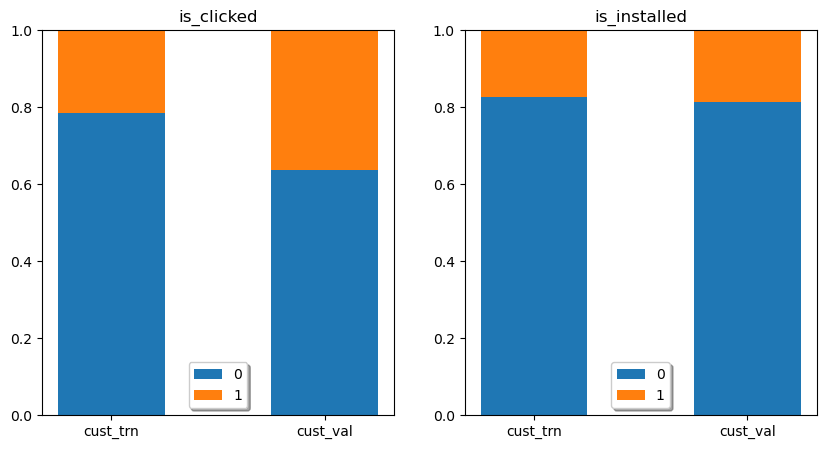

Cust Trn | is_clicked: 0.22 | is_installed: 0.17
Cust Val | is_clicked: 0.36 | is_installed: 0.19


In [16]:
import numpy as np
import matplotlib.pyplot as plt

is_clicked = [trn_df['is_clicked'].mean(), val_df['is_clicked'].mean()]
is_installed = [trn_df['is_installed'].mean(), val_df['is_installed'].mean()]

name = ['cust_trn', 'cust_val']
index = np.arange(len(name))
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

one = is_clicked
zero = [1 - i for i in one]
axs[0].bar(index, zero, width=0.5, label='0')
axs[0].bar(index, one, width=0.5, bottom=zero, label= '1')
axs[0].set_ylim(0, 1)
axs[0].set_xticks(index)
axs[0].set_xticklabels(name)
axs[0].legend(loc='best',  shadow=True)
axs[0].set_title('is_clicked')

one = is_installed
zero = [1 - i for i in one]
axs[1].bar(index, zero, width=0.5, label='0')
axs[1].bar(index, one, width=0.5, bottom=zero, label= '1')
axs[1].set_ylim(0, 1)
axs[1].set_xticks(index)
axs[1].set_xticklabels(name)
axs[1].legend(loc='best',  shadow=True)
axs[1].set_title('is_installed')

plt.show()

print(f"Cust Trn | is_clicked: {trn_df['is_clicked'].mean():.2f} | is_installed: {trn_df['is_installed'].mean():.2f}")
print(f"Cust Val | is_clicked: {val_df['is_clicked'].mean():.2f} | is_installed: {val_df['is_installed'].mean():.2f}")

## Generate Validation Dataset

In [12]:
trn_df.to_csv(trn_data_pth, sep='\t', index=False)
val_df.to_csv(val_data_pth, sep='\t', index=False)

In [13]:
print(trn_df.shape, val_df.shape)

(3387880, 81) (97972, 81)


In [14]:
os.system(f'(cat {trn_data_pth} && sed 1d {val_data_pth}) | cat > {saved_data_pth}')

0

In [16]:
s = ''
for i in range(2, 42):
    s += f'f_{i}:token, '
for i in range(42, 80):
    s += f'f_{i}:float, '
print(s)

f_2:token, f_3:token, f_4:token, f_5:token, f_6:token, f_7:token, f_8:token, f_9:token, f_10:token, f_11:token, f_12:token, f_13:token, f_14:token, f_15:token, f_16:token, f_17:token, f_18:token, f_19:token, f_20:token, f_21:token, f_22:token, f_23:token, f_24:token, f_25:token, f_26:token, f_27:token, f_28:token, f_29:token, f_30:token, f_31:token, f_32:token, f_33:token, f_34:token, f_35:token, f_36:token, f_37:token, f_38:token, f_39:token, f_40:token, f_41:token, f_42:float, f_43:float, f_44:float, f_45:float, f_46:float, f_47:float, f_48:float, f_49:float, f_50:float, f_51:float, f_52:float, f_53:float, f_54:float, f_55:float, f_56:float, f_57:float, f_58:float, f_59:float, f_60:float, f_61:float, f_62:float, f_63:float, f_64:float, f_65:float, f_66:float, f_67:float, f_68:float, f_69:float, f_70:float, f_71:float, f_72:float, f_73:float, f_74:float, f_75:float, f_76:float, f_77:float, f_78:float, f_79:float, 


### Seperate the Customized Ones to Two Tasks

In [20]:
click_saved_data_pth = '/root/data/xingmei/Sharechat-RecSys-Challenge-23/data/click_trn_val.csv'
install_saved_data_pth = '/root/data/xingmei/Sharechat-RecSys-Challenge-23/data/install_trn_val.csv'

In [21]:
trn_df.drop(columns='is_clicked').to_csv('tmp1.csv', sep='\t', index=False)
val_df.drop(columns='is_clicked').to_csv('tmp2.csv', sep='\t', index=False)
os.system(f'(cat tmp1.csv && sed 1d tmp2.csv) | cat > {install_saved_data_pth}')

0

In [22]:
trn_df.drop(columns='is_installed').to_csv('tmp1.csv', sep='\t', index=False)
val_df.drop(columns='is_installed').to_csv('tmp2.csv', sep='\t', index=False)
os.system(f'(cat tmp1.csv && sed 1d tmp2.csv) | cat > {click_saved_data_pth}')

0

In [23]:
os.system('rm tmp*.csv')

0

### Sample 30% For Tuning Hyper-Parameters

In [14]:
sub_data_pth = '/root/data/xingmei/Sharechat-RecSys-Challenge-23/data/sub_trn_val.csv'
click_sub_data_pth = '/root/data/xingmei/Sharechat-RecSys-Challenge-23/data/click_sub_trn_val.csv'
install_sub_data_pth = '/root/data/xingmei/Sharechat-RecSys-Challenge-23/data/install_sub_trn_val.csv'

In [3]:
trn_df = pd.read_csv(trn_data_pth, sep='\t')
val_df = pd.read_csv(val_data_pth, sep='\t')

In [4]:
sub_trn_df = []
for i in range(trn_df['f_1'].min(), trn_df['f_1'].max() + 1):
    sub_trn_df.append(trn_df[trn_df['f_1'] == i].sample(frac=0.3))
sub_trn_df = pd.concat(sub_trn_df, axis=0)
sub_val_df = val_df.sample(frac=0.3)

In [7]:
sub_trn_df.sample(5)

,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,...,f_72,f_73,f_74,f_75,f_76,f_77,f_78,f_79,is_clicked,is_installed
1652239,63,20095,563,22861,25604,21280,27941,19203,869,19343,...,0.571121,0.000000,0.077128,1.156922,0.269948,0.0,0.0,0.0,1,0
3132655,55,6581,22294,5491,25604,14597,27941,19203,23218,22970,...,0.571121,0.000000,0.115692,1.156922,0.269948,0.0,0.0,0.0,0,0
3207604,57,31824,22294,10633,19475,12913,27941,19606,21533,21574,...,1.142243,0.571121,0.115692,1.156922,0.269948,0.0,0.0,0.0,0,0
2919399,59,27426,22294,11338,25604,23855,27941,19203,6675,19343,...,0.000000,0.000000,0.000000,1.156922,0.231384,0.0,0.0,0.0,0,0
739418,65,11077,7779,18575,15908,13503,27941,19203,31372,19343,...,1.713364,0.000000,0.077128,1.156922,0.269948,0.0,0.0,0.0,0,0


In [8]:
sub_val_df.sample(5)

,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,...,f_72,f_73,f_74,f_75,f_76,f_77,f_78,f_79,is_clicked,is_installed
52322,66,26325,22294,4896,21545,32174,27941,19203,6675,19343,...,0.000000,0.000000,0.000000,1.156922,0.000000,0.0,0.0,0.0,0,0
97518,66,1956,22294,32745,15908,30699,27941,21218,6675,22970,...,1.713364,1.142243,0.115692,1.156922,0.269948,0.0,0.0,0.0,1,0
74836,66,20095,563,31686,25604,590,27941,21218,6675,19343,...,0.000000,0.000000,0.115692,1.156922,0.269948,0.0,0.0,0.0,0,0
69808,66,890,7152,497,15908,876,27941,19203,6675,19343,...,0.571121,0.571121,0.115692,1.156922,0.269948,0.0,0.0,0.0,0,0
38035,66,26325,22294,9018,25604,10273,27941,19203,6675,19343,...,2.855607,0.571121,0.115692,1.156922,0.269948,0.0,0.0,0.0,0,0


In [11]:
print(sub_trn_df.shape, sub_val_df.shape)
print(sub_trn_df.shape[0] / sub_val_df.shape[0])

(1016364, 81) (29392, 81)
34.57961350027218


In [15]:
sub_trn_df.to_csv(sub_data_pth, sep='\t', index=False)
sub_val_df.to_csv(sub_data_pth, sep='\t', index=False, header=0, mode='a')

In [16]:
sub_trn_df.drop(columns='is_clicked').to_csv(install_sub_data_pth, sep='\t', index=False)
sub_val_df.drop(columns='is_clicked').to_csv(install_sub_data_pth, sep='\t', index=False, header=0, mode='a')

In [ ]:
sub_trn_df.drop(columns='is_installed').to_csv(click_sub_data_pth, sep='\t', index=False)
sub_val_df.drop(columns='is_installed').to_csv(click_sub_data_pth, sep='\t', index=False, header=0, mode='a')